In [2]:
%pip install pretty_midi

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 5.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 KB 6.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592290 sha256=a34ef86b8391684ed0b509a2cd13c173089084dfce280a5e2bdc238f6879dacd
  Stored in directory: /home/mustansir/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade pretty_midi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install numpy pandas seaborn Ipython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import collections
import datetime
# import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

2024-05-05 19:32:59.458127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 19:32:59.458388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 19:32:59.515816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 19:32:59.638880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 19:33:01.228317: W tensorflow/compiler/tf2

In [6]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [16]:
import os
print(os.getcwd())

/home/mustansir/NJIT Spring 2024/Deep Learninig/music_project/DS677_Transformer_generation/MIDI Music Generation


In [19]:
import pathlib

# Assuming you're in the correct working directory
data_dir = pathlib.Path('./maestro-v3.0.0-midi')

In [17]:
data_dir = pathlib.Path('/maestro-v3.0.0-midi')

In [21]:
import glob

filenames = glob.glob(str(data_dir / '**/*.midi'), recursive=True)
print('Number of files:', len(filenames))

Number of files: 1276


In [22]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [23]:
sample_file = filenames[2]
print(sample_file)

maestro-v3.0.0-midi/maestro-v3.0.0/2017/MIDI-Unprocessed_055_PIANO055_MID--AUDIO-split_07-07-17_Piano-e_1-04_wav--2.midi


In [24]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [25]:
import IPython.display as display

def display_audio(pm: pretty_midi.PrettyMIDI, seconds=20, sampling_rate=44100):
    # Synthesize the MIDI data into an audio waveform
    audio_data = pm.synthesize(fs=sampling_rate)

    # Take a sample of the generated waveform to mitigate kernel resets
    waveform_short = audio_data[:int(seconds * sampling_rate)]

    # Display the audio
    return display.Audio(waveform_short, rate=sampling_rate)

In [26]:
display_audio(pm)

In [27]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)
print(len(instrument.notes))
print(instrument.notes[:5])

Number of instruments: 1
Instrument name: Acoustic Grand Piano
2761
[Note(start=1.431250, end=3.357292, pitch=49, velocity=48), Note(start=1.676042, end=3.484375, pitch=52, velocity=43), Note(start=2.178125, end=3.739583, pitch=57, velocity=54), Note(start=5.252083, end=5.858333, pitch=61, velocity=45), Note(start=6.658333, end=7.109375, pitch=64, velocity=57)]


In [28]:
for i, note in enumerate(instrument.notes[:10]):
  print(i, note)
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0 Note(start=1.431250, end=3.357292, pitch=49, velocity=48)
0: pitch=49, note_name=C#3, duration=1.9260
1 Note(start=1.676042, end=3.484375, pitch=52, velocity=43)
1: pitch=52, note_name=E3, duration=1.8083
2 Note(start=2.178125, end=3.739583, pitch=57, velocity=54)
2: pitch=57, note_name=A3, duration=1.5615
3 Note(start=5.252083, end=5.858333, pitch=61, velocity=45)
3: pitch=61, note_name=C#4, duration=0.6063
4 Note(start=6.658333, end=7.109375, pitch=64, velocity=57)
4: pitch=64, note_name=E4, duration=0.4510
5 Note(start=1.235417, end=10.244792, pitch=45, velocity=33)
5: pitch=45, note_name=A2, duration=9.0094
6 Note(start=0.642708, end=10.784375, pitch=37, velocity=34)
6: pitch=37, note_name=C#2, duration=10.1417
7 Note(start=0.973958, end=10.785417, pitch=40, velocity=28)
7: pitch=40, note_name=E2, duration=9.8115
8 Note(start=8.430208, end=11.863542, pitch=69, velocity=52)
8: pitch=69, note_name=A4, duration=3.4333
9 Note(start=12.783333, end=12.831250, pitch=69, velocity=69)
9: 

In [30]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [31]:
raw_notes = midi_to_notes(sample_file)
raw_notes

,pitch,start,end,step,duration
0,37,0.642708,10.784375,0.000000,10.141667
1,40,0.973958,10.785417,0.331250,9.811458
2,45,1.235417,10.244792,0.261458,9.009375
3,49,1.431250,3.357292,0.195833,1.926042
4,52,1.676042,3.484375,0.244792,1.808333
...,...,...,...,...,...
2756,38,350.213542,355.002083,0.013542,4.788542
2757,65,350.220833,353.366667,0.007292,3.145833
2758,50,350.223958,355.171875,0.003125,4.947917
2759,69,350.229167,354.411458,0.005208,4.182292


In [32]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names

array(['C#2', 'E2', 'A2', ..., 'D3', 'A4', 'D4'], dtype='<U3')

In [33]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

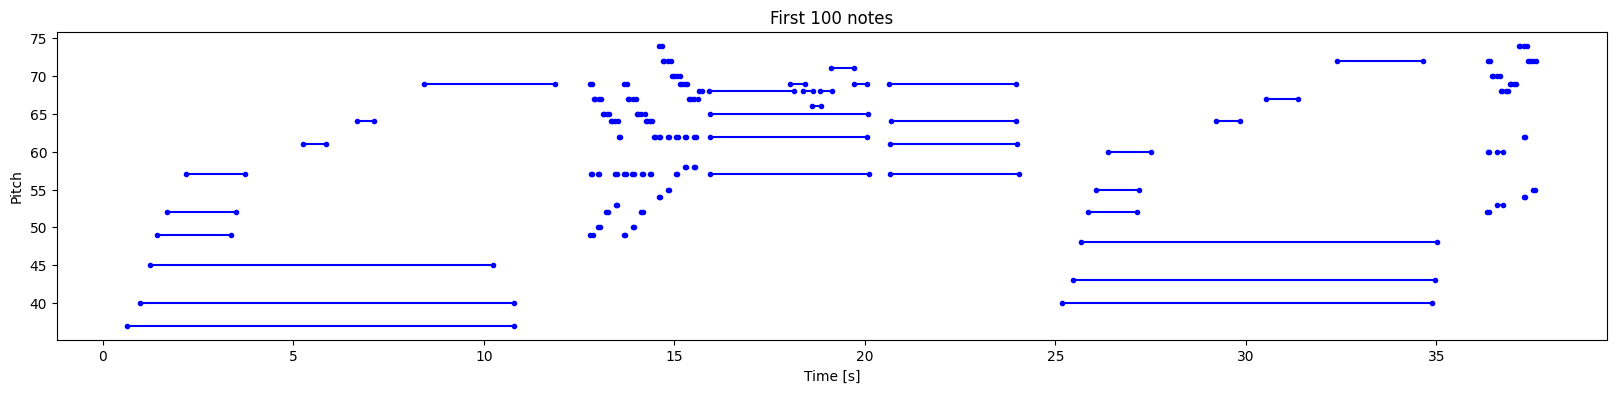

In [34]:
plot_piano_roll(raw_notes, count=100)

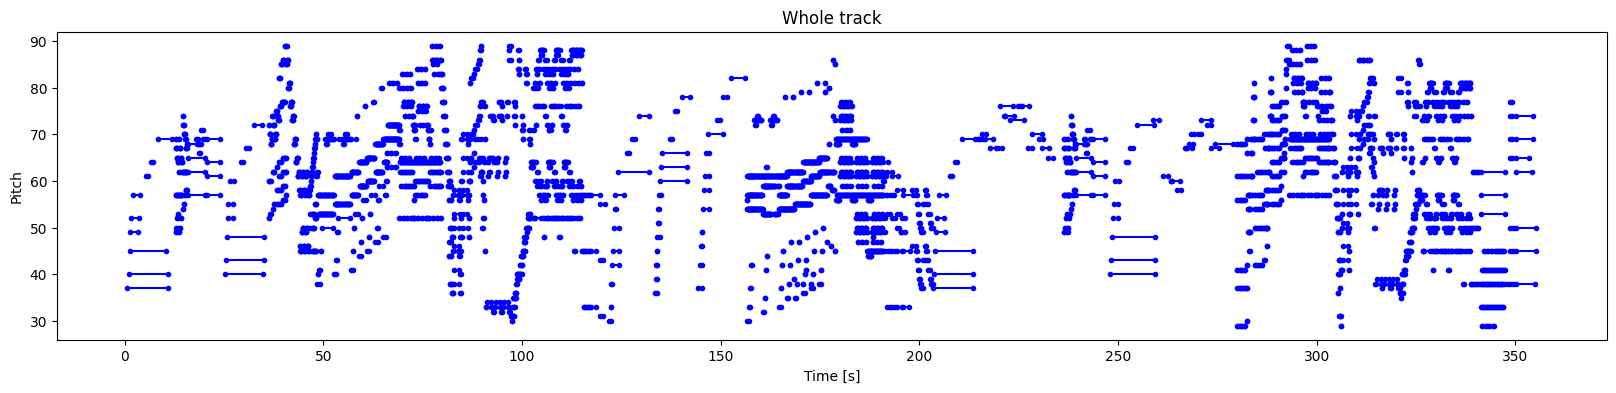

In [35]:
plot_piano_roll(raw_notes)

In [36]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))
  
  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

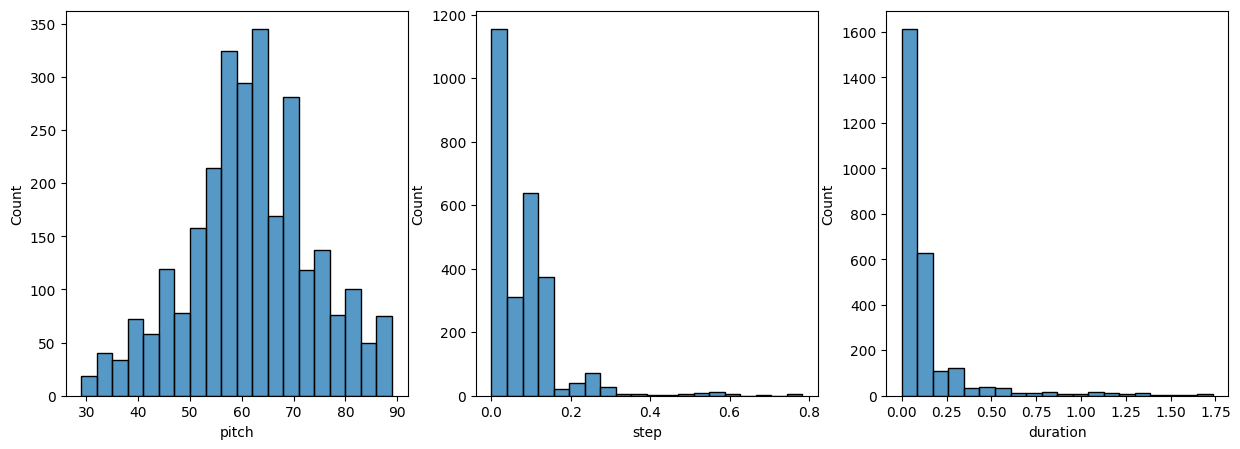

In [37]:
plot_distributions(raw_notes)